In [1]:

import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd
%matplotlib inline
from scipy import stats

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# final_data.csv has 5635978 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Documents/final_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'final_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 65 columns


In [3]:
df1.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,06-01-2016,AA,19805,AA,N4YBAA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,07-01-2016,AA,19805,AA,N434AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,08-01-2016,AA,19805,AA,N541AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,09-01-2016,AA,19805,AA,N489AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,10-01-2016,AA,19805,AA,N439AA,...,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [4]:
df1.fillna(0, inplace=True)

In [5]:
df1.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,06-01-2016,AA,19805,AA,N4YBAA,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,1,7,4,07-01-2016,AA,19805,AA,N434AA,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,1,8,5,08-01-2016,AA,19805,AA,N541AA,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1,1,9,6,09-01-2016,AA,19805,AA,N489AA,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,1,10,7,10-01-2016,AA,19805,AA,N439AA,...,4,0.0,0.0,47.0,0.0,66.0,0.0,0.0,0.0,0.0


In [6]:
df1['LATE_AIRCRAFT_DELAY'].median()

0.0

In [7]:
df1['LATE_AIRCRAFT_DELAY'].mean()

5.303

In [8]:
df1['LATE_AIRCRAFT_DELAY'].mode()

0    0.0
Name: LATE_AIRCRAFT_DELAY, dtype: float64

In [9]:
df1['LATE_AIRCRAFT_DELAY'].std()

27.72771207685588

In [10]:
df1['LATE_AIRCRAFT_DELAY'].var()

768.8260170170194

In [14]:
LATE_AIRCRAFT_DELAY = df1[df1['LATE_AIRCRAFT_DELAY'].notna()]['LATE_AIRCRAFT_DELAY']
print(LATE_AIRCRAFT_DELAY)

0       0.0
1       0.0
2       0.0
3       0.0
4      66.0
       ... 
995     0.0
996     0.0
997     0.0
998     0.0
999     0.0
Name: LATE_AIRCRAFT_DELAY, Length: 1000, dtype: float64


sum of z score: -5.6621374255882984e-14
outliners with z > 15: 1


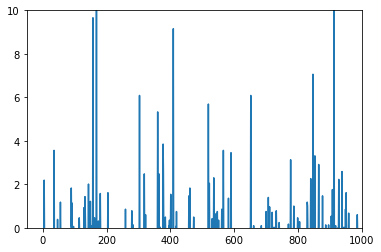

In [15]:
zscore = stats.zscore(LATE_AIRCRAFT_DELAY, nan_policy='omit')

cnt = 0
print("sum of z score:", sum(zscore))
for i in zscore :
    if i > 15 :
        cnt+=1
print("outliners with z > 15:",cnt)
plt.axis([-50,1000,0,10])
plt.plot(zscore)
plt.show()

C:\Users\91936\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


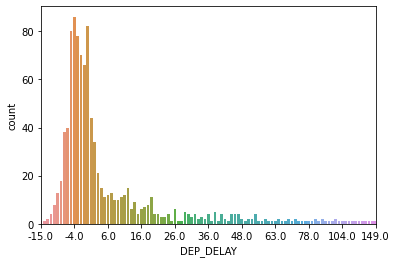

In [7]:
import matplotlib.ticker as ticker

ax = sns.countplot(df1['DEP_DELAY'])
plt.xlim(0,100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

C:\Users\91936\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEP_TIME'>

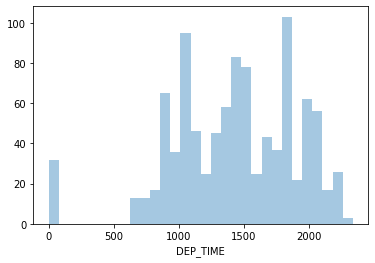

In [17]:
sns.distplot(df1['DEP_TIME'], kde=False, bins = 30)

<AxesSubplot:xlabel='DEP_DELAY'>

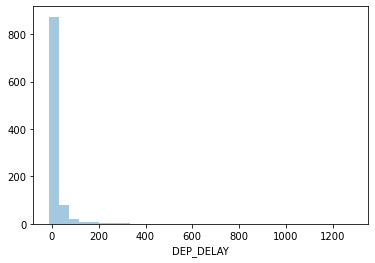

In [19]:
sns.distplot(df1['DEP_DELAY'], kde = False, bins=30)

<AxesSubplot:xlabel='TAXI_OUT'>

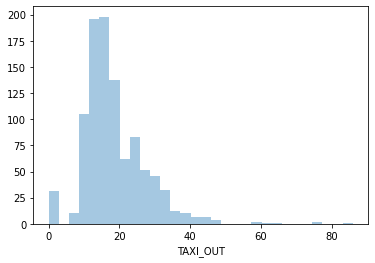

In [20]:
sns.distplot(df1['TAXI_OUT'], kde = False, bins = 30)

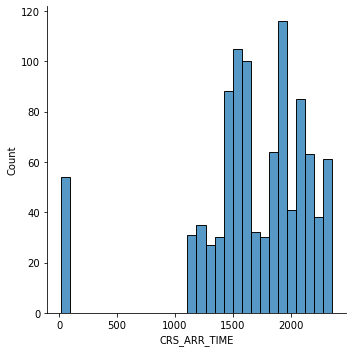

In [8]:
sns.displot(df1['CRS_ARR_TIME'], kde = False, bins = 30)

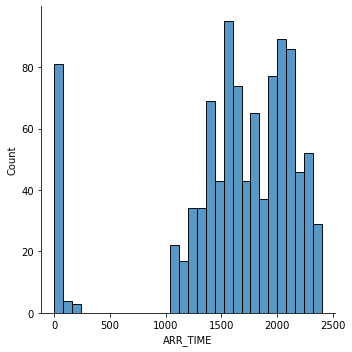

In [9]:
sns.displot(df1['ARR_TIME'], kde = False, bins = 30)

C:\Users\91936\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


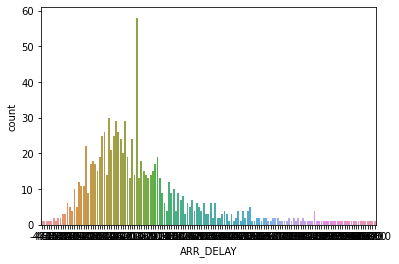

In [24]:
sns.countplot(df1['ARR_DELAY'])
plt.show()

<AxesSubplot:xlabel='DIVERTED', ylabel='ARR_DELAY'>

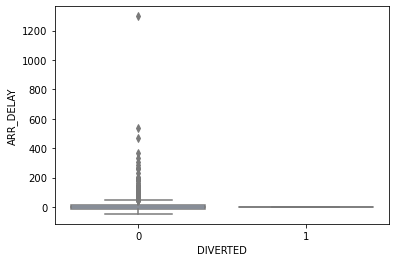

In [25]:
sns.boxplot(x = "DIVERTED", y = "ARR_DELAY", data = df1, palette="coolwarm")

In [10]:
corr, _ = stats.pearsonr(df1['CRS_ARR_TIME'], df1['CRS_DEP_TIME'])
print("corr: %.3f"%corr)

corr: 0.173


In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
def plotCorrelationM(df, graphWidth):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

C:\Users\91936\AppData\Local\Temp\ipykernel_4144\2285364989.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


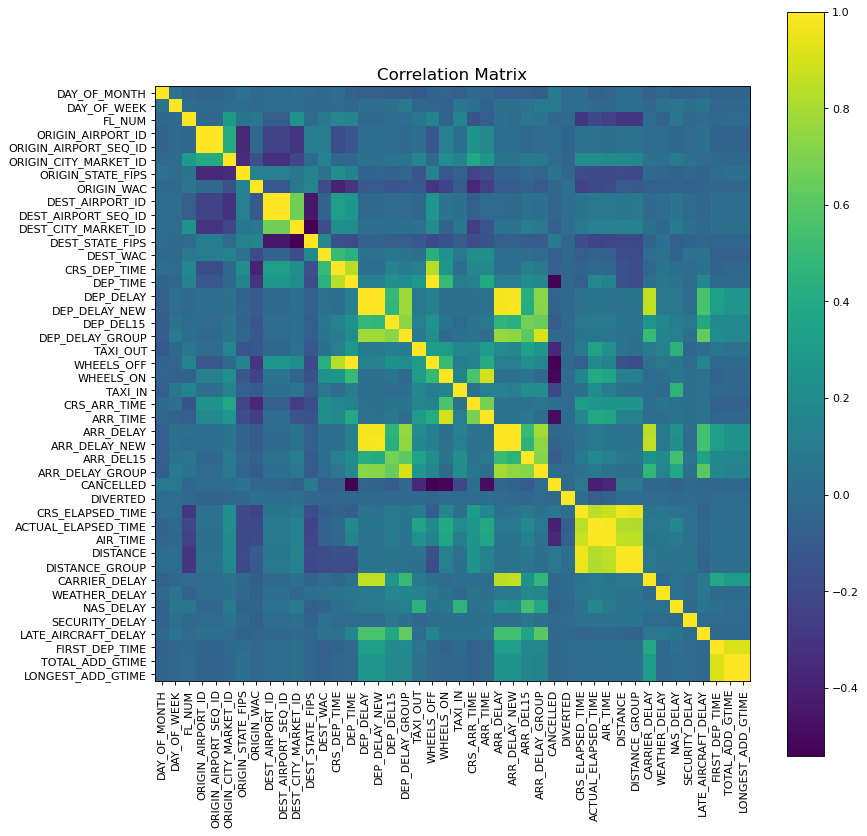

In [13]:
plotCorrelationM(df1,12)